<a href="https://colab.research.google.com/github/Ahnaf20/Data-Mining-Kel-8/blob/main/DataMining_Case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally 
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/Ahnaf20/Data-Mining-Kel-8/master/data/price.csv
    price = pd.read_csv('data/price.csv')

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

In [ ]:
import warnings; warnings.simplefilter('ignore')
import scipy
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
#import dan melihat tipe, ukuran data depok
dataD = pd.read_csv('depok.csv')
N, P = dataD.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
print("Tipe Variabel dataD = ", type(dataD))
print(dataD)

baris =  998 , Kolom(jumlah variabel)=  26
Tipe Variabel dataD =  <class 'pandas.core.frame.DataFrame'>
    created_at   LT     LB   KT   KM  garasi  carport     lokasi sertifikat  \
0    6-12-2021  165  200.0  4.0  2.0     NaN      1.0  Sukmajaya        SHM   
1    6-12-2021   50   45.0  2.0  1.0     NaN      NaN   Cipayung        SHM   
2    6-12-2021   50   36.0  2.0  1.0     NaN      1.0   Sawangan        SHM   
3    6-12-2021   50   45.0  2.0  1.0     NaN      NaN  Cimanggis        SHM   
4    6-12-2021   72   45.0  2.0  1.0     NaN      1.0   Sawangan        SHM   
..         ...  ...    ...  ...  ...     ...      ...        ...        ...   
993        NaN  NaN    NaN  NaN  NaN     NaN      NaN        NaN        NaN   
994        NaN  NaN    NaN  NaN  NaN     NaN      NaN        NaN        NaN   
995        NaN  NaN    NaN  NaN  NaN     NaN      NaN        NaN        NaN   
996        NaN  NaN    NaN  NaN  NaN     NaN      NaN        NaN        NaN   
997        NaN  NaN    NaN 

In [ ]:
#menambahkan kolom Kota pada data depok
dfD = pd.DataFrame(dataD)
dfD_dpk = dfD.assign(Kota = "Depok")
N, P = dfD_dpk.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
dfD_dpk

baris =  998 , Kolom(jumlah variabel)=  27


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Kota
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok


In [ ]:
#import dan melihat tipe, ukuran data depok
dataJ = pd.read_csv('jakarta.csv')
N, P = dataJ.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
print("Tipe Variabel dataJ = ", type(dataJ))
print(dataJ)

baris =  1024 , Kolom(jumlah variabel)=  26
Tipe Variabel dataJ =  <class 'pandas.core.frame.DataFrame'>
      created_at     LT     LB   KT   KM  garasi  carport         lokasi  \
0     06-12-2021  202.0  198.0  8.0  3.0     NaN      NaN  Jakarta Pusat   
1     02-12-2021   30.0   55.0  2.0  1.0     NaN      1.0  Jakarta Pusat   
2     06-12-2021   19.0   35.0  2.0  1.0     NaN      NaN  Jakarta Pusat   
3     06-12-2021   33.0   42.0  2.0  2.0     NaN      1.0  Jakarta Pusat   
4     06-12-2021   30.0   55.0  2.0  2.0     NaN      1.0  Jakarta Pusat   
...          ...    ...    ...  ...  ...     ...      ...            ...   
1019         NaN    NaN    NaN  NaN  NaN     NaN      NaN            NaN   
1020         NaN    NaN    NaN  NaN  NaN     NaN      NaN            NaN   
1021         NaN    NaN    NaN  NaN  NaN     NaN      NaN            NaN   
1022         NaN    NaN    NaN  NaN  NaN     NaN      NaN            NaN   
1023         NaN    NaN    NaN  NaN  NaN     NaN      NaN  

In [ ]:
#menambahkan kolom Kota pada data jakarta
dfJ = pd.DataFrame(dataJ)
dfJ_jkt = dfJ.assign(Kota = "Jakarta")
N, P = dfJ_jkt.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
dfJ_jkt

baris =  1024 , Kolom(jumlah variabel)=  27


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Kota
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta


In [ ]:
#import dan melihat tipe, ukuran data depok
dataT = pd.read_csv('tangerang.csv')
N, P = dataT.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
print("Tipe Variabel dataT = ", type(dataT))
print(dataT)

baris =  128 , Kolom(jumlah variabel)=  26
Tipe Variabel dataT =  <class 'pandas.core.frame.DataFrame'>
     created_at     LT     LB   KT   KM  garasi  carport  \
0    12-06-2021   60.0   50.0  3.0  2.0     NaN      NaN   
1    12-06-2021   72.0   54.0  2.0  1.0     1.0      1.0   
2    12-06-2021   60.0   48.0  3.0  2.0     2.0      2.0   
3    12-06-2021  200.0  225.0  5.0  4.0     NaN      NaN   
4    12-06-2021   76.0  123.0  3.0  3.0     NaN      2.0   
..          ...    ...    ...  ...  ...     ...      ...   
123  12-08-2021   91.0   91.0  3.0  2.0     NaN      NaN   
124         NaN    NaN    NaN  NaN  NaN     NaN      NaN   
125         NaN    NaN    NaN  NaN  NaN     NaN      NaN   
126         NaN    NaN    NaN  NaN  NaN     NaN      NaN   
127         NaN    NaN    NaN  NaN  NaN     NaN      NaN   

                        lokasi sertifikat  listrik  ... Unnamed: 16  \
0          BSD CITY, TANGERANG        SHM   1300.0  ...         NaN   
1            CISAUK, TANGERANG   

In [ ]:
#menambahkan kolom daerah pada data depok
dfT = pd.DataFrame(dataT)
dfT_tng = dfT.assign(Kota = "Tangerang")
N, P = dfT_tng.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ',  P)
dfT_tng

baris =  128 , Kolom(jumlah variabel)=  27


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Kota
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang


##Gabungan Data depok, jakarta, dan tangerang

In [ ]:
dg = pd.concat([dfD_dpk, dfJ_jkt, dfT_tng], axis = 0)
dg

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Kota
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang


Karena data unnamed tidak diperlukan dan tidak memiliki informasi, maka kita hapus kolom unnamed tersebut

In [ ]:
dg.drop(columns = ['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 
                   'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)

In [ ]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150 entries, 0 to 127
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  364 non-null    object 
 1   LT          365 non-null    object 
 2   LB          363 non-null    float64
 3   KT          363 non-null    float64
 4   KM          363 non-null    float64
 5   garasi      107 non-null    float64
 6   carport     276 non-null    float64
 7   lokasi      363 non-null    object 
 8   sertifikat  359 non-null    object 
 9   listrik     334 non-null    float64
 10  hadap       147 non-null    object 
 11  harga       363 non-null    float64
 12  URL         363 non-null    object 
 13  deskripsi   354 non-null    object 
 14  Kota        2150 non-null   object 
dtypes: float64(7), object(8)
memory usage: 268.8+ KB


In [ ]:
dg.dtypes

created_at     object
LT             object
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
Kota           object
dtype: object

In [ ]:
dg.shape

(2150, 15)

##Mengganti Tipe Data

##Cek Duplikasi Data

In [ ]:
print(dg.shape)
dg.duplicated().sum()

(2150, 15)


1782

In [ ]:
#menghapus duplikasi data
dg.drop_duplicates(inplace = True)
print(dg.shape)
dg.duplicated().sum()

(368, 15)


0

##Missing Value

In [ ]:
dg.shape

(368, 15)

In [ ]:
##mengecek missing value
print(dg.isnull().sum())

created_at      4
LT              3
LB              5
KT              5
KM              5
garasi        261
carport        92
lokasi          5
sertifikat      9
listrik        34
hadap         221
harga           5
URL             5
deskripsi      14
Kota            0
dtype: int64


In [ ]:
#mengatasi MV LB
mean = dg["LB"].mean()
dg["LB"] = dg["LB"].replace(np.nan, mean)
dg

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Kota
0,6-12-2021,165,200.000000,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,Depok
1,6-12-2021,50,45.000000,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,Depok
2,6-12-2021,50,36.000000,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,Depok
3,6-12-2021,50,45.000000,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,Depok
4,6-12-2021,72,45.000000,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,12-08-2021,66.0,70.000000,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tangerang
121,12-08-2021,202.0,85.000000,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tangerang
122,12-08-2021,108.0,130.000000,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Tangerang
123,12-08-2021,91.0,91.000000,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...,Tangerang


In [ ]:
print(dg.isnull().sum())

created_at      4
LT              3
LB              0
KT              5
KM              5
garasi        261
carport        92
lokasi          5
sertifikat      9
listrik        34
hadap         221
harga           5
URL             5
deskripsi      14
Kota            0
dtype: int64


In [ ]:
#mengatasi MV KT
mean = dg["KT"].mean()
dg["KT"] = dg["KT"].replace(np.nan, mean)
dg

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Kota
0,6-12-2021,165,200.000000,4.0000,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,Depok
1,6-12-2021,50,45.000000,2.0000,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,Depok
2,6-12-2021,50,36.000000,2.0000,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,Depok
3,6-12-2021,50,45.000000,2.0000,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,Depok
4,6-12-2021,72,45.000000,2.0000,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,12-08-2021,66.0,70.000000,3.0000,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tangerang
121,12-08-2021,202.0,85.000000,4.0000,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tangerang
122,12-08-2021,108.0,130.000000,3.0000,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Tangerang
123,12-08-2021,91.0,91.000000,3.0000,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...,Tangerang


In [ ]:
#mengatasi MV KM
mean = dg["KM"].mean()
dg["KM"] = dg["KM"].replace(np.nan, mean)
dg

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Kota
0,6-12-2021,165,200.000000,4.0000,2.000000,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,Depok
1,6-12-2021,50,45.000000,2.0000,1.000000,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,Depok
2,6-12-2021,50,36.000000,2.0000,1.000000,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,Depok
3,6-12-2021,50,45.000000,2.0000,1.000000,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,Depok
4,6-12-2021,72,45.000000,2.0000,1.000000,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,12-08-2021,66.0,70.000000,3.0000,2.000000,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tangerang
121,12-08-2021,202.0,85.000000,4.0000,3.000000,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tangerang
122,12-08-2021,108.0,130.000000,3.0000,3.000000,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Tangerang
123,12-08-2021,91.0,91.000000,3.0000,2.000000,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...,Tangerang


In [ ]:
print(dg.isnull().sum())

created_at      4
LT              3
LB              0
KT              0
KM              0
garasi        261
carport        92
lokasi          5
sertifikat      9
listrik        34
hadap         221
harga           5
URL             5
deskripsi      14
Kota            0
dtype: int64


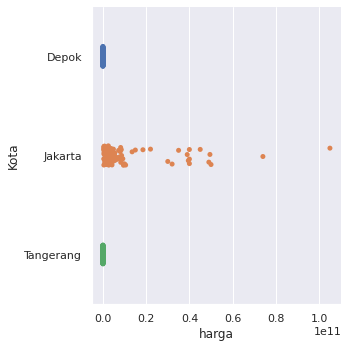

In [ ]:
p = sns.catplot(x="harga", y="Kota", data = dg)